<a href="https://colab.research.google.com/github/Prakhar1802/Spotify-Popularity-Analysis/blob/main/Spotify_Trend_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SpotiTrend**


> Analyzing Spotify Music Trends and Artist Popularity.


This is a Python based project in which I am going to use the Spotify API to access the authorization of teir data for the analysis.

In this analysis we are going to find the trends and the popularity of the artist, also by this we are getting the intrest of the users, wwhat they prefer most.

For finding these things I need to use the linear regression and also, some python packages to do the analysis and visualization of he data.

There are some steps that are followed to do this analysis these are as follows...

1. **Authentication with Spotify API**:
   - Set up authentication to access Spotify's data using your client ID and client secret.
   - Utilize the Spotify API's authorization flow to authenticate and obtain access tokens.

2. **Data Retrieval**:
   - Use the authorized access token to retrieve data from Spotify's API.
   - Gather data on music tracks, albums, artists, and user preferences.

3. **Data Preprocessing**:
   - Clean and preprocess the retrieved data to remove any inconsistencies or missing values.
   - Organize the data into appropriate data structures for analysis.

4. **Linear Regression Analysis**:
   - Implement linear regression models to analyze trends and predict artist popularity.
   - Identify relationships between variables such as track features and artist popularity metrics.

5. **Visualization**:
   - Utilize Python packages like Matplotlib for data visualization.
   - Create visualizations such as scatter plots, line graphs, or bar charts to illustrate trends and correlations in the data.

6. **Interpretation of Results**:
   - Analyze the results of the linear regression analysis and visualizations.
   - Draw conclusions about music trends, artist popularity, and user preferences based on the findings.

7. **Presentation and Documentation**:
   - Document the project including setup instructions, usage guidelines, and explanations of the analysis process.
   - Prepare a presentation to communicate the project's objectives, methodology, results, and conclusions.


# **Step1: Authentication with Spotify API**

First we need to login to spotify for developers using the given link [Spotify For Devlopers](https://developer.spotify.com/)

Next is we need to create the new app, that contain the client_id and cliend secret, both are very important for fetching the data from spotify.


```
CLIENT_ID = "Put the client ID here from spotify API"
CLIENT_SECRET = "Put the client secret here from spotify API"

```
Client_Id and Client_Secret provide us the authorization to ftch the data from the spotify and also we are able to create out own app according to our need.

Now let's start to do some coding to make it more usefull...

# **Step2: Import all the dependencies**

we need to Include all the packages that are going to use for this analysis, if the package is not available, then we have to download and install it, by using

```
!pip install {package name}
```
if you are using any IDE then for that use


```
pip install {package name}
```





In [42]:
# !pip install requests
from google.colab import userdata
import requests
import base64
import json

# **Step 3: Setting Up the Spotify API**
---
>First we need to login to spotify develope to get the client id and client secret, also, after that we need to get the authentication by geting the authentication.



In [43]:
client_id = userdata.get('client_id')
client_secret = userdata.get('client_secret')

In [44]:
def get_token(client_id, client_secret):
    auth_string = f"{client_id}:{client_secret}"
    auth_bytes = auth_string.encode("utf-8")
    auth_base64 = base64.b64encode(auth_bytes).decode("utf-8")

    url = "https://accounts.spotify.com/api/token"

    headers = {
        "Authorization": "Basic " + auth_base64,
        "Content-Type": "application/x-www-form-urlencoded"
    }

    data = {"grant_type": "client_credentials"}

    try:
        response = requests.post(url, headers=headers, data=data)
        response.raise_for_status()
        token = response.json()["access_token"]
        return token
    except requests.exceptions.RequestException as e:
        print("Error:", e)
        return None





In [45]:
def get_auth_header(token):
  return{"Authorization": f"Bearer {token}",
        "Content-Type": "application/json"}


# **Search function for the artist name to create the dataset**

In [46]:
def search_for_artist(token, artist_name):
    url = "https://api.spotify.com/v1/search"
    headers = get_auth_header(token)
    query = {
        "q": artist_name,
        "type": "artist",
        "limit": 1
    }

    try:
        result = requests.get(url, headers=headers, params=query)
        result.raise_for_status()
        json_result = result.json()["artists"]["items"]

        if len(json_result) == 0:
          print("No artist found!!")
          return None
        else:
           return json_result[0]

    except requests.exceptions.RequestException as e:
        print("Error:", e)
        return None


In [47]:
def songs_by_artist(token, artist_id):
  url = f"https://api.spotify.com/v1/artists/{artist_id}/top-tracks"
  headers = get_auth_header(token)
  try:
    result = requests.get(url, headers=headers)
    result.raise_for_status()
    json_result = result.json()["tracks"]
    return json_result

  except requests.exceptions.RequestException as e:
      print("Error:", e)
      return None

In [48]:
token = get_token(client_id, client_secret)
result = search_for_artist(token, "Arjeet")
songs = songs_by_artist(token, result["id"])
print(songs)

[{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3sBtKwaTveANiltp7XgBLU'}, 'href': 'https://api.spotify.com/v1/artists/3sBtKwaTveANiltp7XgBLU', 'id': '3sBtKwaTveANiltp7XgBLU', 'name': 'Ajeet', 'type': 'artist', 'uri': 'spotify:artist:3sBtKwaTveANiltp7XgBLU'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES', 'SE', 'CH', 'TW', 'TR', 'UY', 'US', 'GB', 'AD', 'LI', 'MC', 'ID', 'JP', 'TH', 'VN', 'RO', 'IL', 'ZA', 'SA', 'AE', 'BH', 'QA', 'OM', 'KW', 'EG', 'MA', 'DZ', 'TN', 'LB', 'JO', 'PS', 'IN', 'BY', 'KZ', 'MD', 'UA', 'AL', 'BA', 'HR', 'ME', 'MK', 'RS', 'SI', 'KR', 'BD', 'PK', 'LK', 'GH', 'KE', 'NG', 'TZ', 'UG', 'AG', 'AM', 'BS', 'BB', 'BZ', 'BT', 'BW', 'BF', 'CV', 'CW', 'D

In [49]:
for idx, song in enumerate(songs):
    print(f"{idx+1}. {song['name']}")


1. Akaal
2. Dance of Ganesha
3. Haseya
4. Ong Namo
5. Kiss the Earth
6. Ra Ma da Sa Healing
7. Light of My Soul
8. Peace
9. Sat Narayan Wahe Guru
10. Healing Song


In [50]:
def get_genres(token, limit=50, offset=0):
  url = 'https://api.spotify.com/v1/browse/categories'
  headers = get_auth_header(token)
  params = {
    "limit":limit,
    "offset": offset
  }
  try:
    result = requests.get(url, headers=headers, params=params)
    result.raise_for_status()
    json_result = result.json()
    genres = [(category["id"], category["name"]) for category in json_result["categories"]["items"]]
    return genres

  except requests.exceptions.RequestException as e:
      print("Error:", e)
      return None


In [51]:
gener = get_genres(token)
print("List of genere")
for genre_id, genre_name in gener:
  print(f"{genre_name}")

List of genere
Made For You
New Releases
Spotify CLASSICS
Hip-Hop
Pop
Country
Charts
Latin
Student
Rock
Dance/Electronic
Discover
In the car
Mood
Indie
Disney
R&B
Christian & Gospel
Workout
Música Mexicana
La Tierra del Corrido
K-pop
Chill
Netflix
Sleep
Party
At Home
Decades
Love
Metal
Jazz
Trending
Frequency
Classical
Folk & Acoustic
Focus
Soul
Kids & Family
Gaming
Anime
TV & Movies
Instrumental
Punk
Ambient
Blues
Cooking & Dining
Alternative
Travel
Caribbean
Afro


In [52]:
!pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_crediential_manager = SpotifyClientCredentials(client_id = client_id, client_secret = client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_crediential_manager)

access_token = get_token(client_id, client_secret)

def get_artist_genre(artist_id):
  artist = sp.artist(artist_id)
  return artist["genres"]

In [53]:
import pandas as pd
import time

def create_dataframe(query_list, limit=50):
  data = {
      "Track_Id":[],
      "Track_name":[],
      "Artist_name":[],
      "Popularity_score":[],
      "Release_year":[],
      "Genre":[]
  }
  for query in query_list:
    search_result = sp.search(query, limit=limit, type="track")
    tracks = search_result['tracks']["items"]

    for  track in tracks:
      data["Track_Id"].append(track["id"])
      data["Track_name"].append(track["name"])
      data["Artist_name"].append(track["artists"][0]["name"])
      data["Popularity_score"].append(track["popularity"])
      data["Release_year"].append(track["album"]["release_date"][:4])
      data["Genre"].append(query)

    time.sleep(2)

  df = pd.DataFrame(data)
  return df

genres = [
'genre:"Made For You"',
'genre:"New Releases"',
'genre:"Spotify CLASSICS"',
'genre:"Hip-Hop"',
'genre:"Pop"',
'genre:"New Releases"',
'genre:"Country"',
'genre:"Charts"',
'genre:"Latin"',
'genre:"Student"',
'genre:"Rock"',
'genre:"Dance/Electronic"',
'genre:"Discover"',
'genre:"In the car"',
'genre:"Mood"',
'genre:"Indie"',
'genre:"Disney"',
'genre:"R&B"',
'genre:"Christian & Gospel"',
'genre:"Workout"',
'genre:"K-pop"',
'genre:"Chill"',
'genre:"Netflix"',
'genre:"Sleep"',
'genre:"Party"',
'genre:"At Home"',
'genre:"Decades"',
'genre:"Love"',
'genre:"Metal"',
'genre:"Jazz"',
'genre:"Trending"',
'genre:"Frequency"',
'genre:"Classical"',
'genre:"Focus"',
'genre:"Soul"',
'genre:"Kids & Family"',
'genre:"Anime"',
'genre:"TV & Movies"',
'genre:"Instrumental"',
'genre:"Punk"',
'genre:"Ambient"',
'genre:"Blues"',
'genre:"Alternative"',
'genre:"Travel"',
'genre:"Caribbean"',
'genre:"Afro"',
]

df = create_dataframe(genres, limit=50)
print(df)


                    Track_Id              Track_name         Artist_name  \
0     5Ukr0X3XwTfJo6YrosDOtO    The Knock (Acapella)  The Grouch & Eligh   
1     60SUQJ6bYhXyVdhEPo6S0R           YEEZY RUNNERS         Veno Da Don   
2     2ctnJWsrsWCaIxMSCY6Rcs                Moeilijk                TAVV   
3     19FSZ4ttCfuGtlxr6u3n3Z               Tha Nigga         Richie Rich   
4     1S0DU4j4uazhI3FpOzCY81         Dramas e Karmas            Don Nuno   
...                      ...                     ...                 ...   
1445  3EcjKeYBapaY3SC8QtvxuU               Attention            Omah Lay   
1446  0LZXkgdwf3jwUZQw4XDIAP  Thath' Isigubhu (Live)           Thandiswa   
1447  7iAqI0fkfsqTQiSOIPVVAc                  Apa Mi            Lil Kesh   
1448  0zi3opBVZAgqVfr3HeQXfz   Viva o Rio de Janeiro     Esdras Nogueira   
1449  060BxSx0otr05lI94HxWTP                   Jaiye                Qdot   

      Popularity_score Release_year            Genre  
0                    0         2

In [54]:
df["Genre"].value_counts()

Genre
genre:"Hip-Hop"               50
genre:"Love"                  50
genre:"Caribbean"             50
genre:"Alternative"           50
genre:"Blues"                 50
genre:"Ambient"               50
genre:"Punk"                  50
genre:"Instrumental"          50
genre:"Anime"                 50
genre:"Soul"                  50
genre:"Focus"                 50
genre:"Classical"             50
genre:"Jazz"                  50
genre:"Metal"                 50
genre:"Party"                 50
genre:"Pop"                   50
genre:"Sleep"                 50
genre:"Chill"                 50
genre:"K-pop"                 50
genre:"Workout"               50
genre:"Christian & Gospel"    50
genre:"R&B"                   50
genre:"Indie"                 50
genre:"Mood"                  50
genre:"Dance/Electronic"      50
genre:"Rock"                  50
genre:"Latin"                 50
genre:"Country"               50
genre:"Afro"                  50
Name: count, dtype: int64

In [55]:
def get_audio_features(track_ids):
  features_list = []

  for i in range(0, len(track_ids), 50):
    batch = track_ids[i:i+50]
    features_result = sp.audio_features(batch)
    features_list += features_result
  return features_list


In [56]:
track_ids = df["Track_Id"].tolist()
audio_features = get_audio_features(track_ids)

In [57]:
audio_feature_df = pd.DataFrame(audio_features)
merge_df = df.merge(audio_feature_df, left_on="Track_Id", right_on="id", how="inner")
print(merge_df)

                    Track_Id             Track_name         Artist_name  \
0     5Ukr0X3XwTfJo6YrosDOtO   The Knock (Acapella)  The Grouch & Eligh   
1     60SUQJ6bYhXyVdhEPo6S0R          YEEZY RUNNERS         Veno Da Don   
2     2ctnJWsrsWCaIxMSCY6Rcs               Moeilijk                TAVV   
3     19FSZ4ttCfuGtlxr6u3n3Z              Tha Nigga         Richie Rich   
4     1S0DU4j4uazhI3FpOzCY81        Dramas e Karmas            Don Nuno   
...                      ...                    ...                 ...   
1577  74a2RfIgEmVhSPDwk1J8ZL     Dios Creó El Mundo         Susana Baca   
1578  3EcjKeYBapaY3SC8QtvxuU              Attention            Omah Lay   
1579  7iAqI0fkfsqTQiSOIPVVAc                 Apa Mi            Lil Kesh   
1580  0zi3opBVZAgqVfr3HeQXfz  Viva o Rio de Janeiro     Esdras Nogueira   
1581  060BxSx0otr05lI94HxWTP                  Jaiye                Qdot   

      Popularity_score Release_year            Genre  danceability  energy  \
0                    

In [58]:
unique_df = merge_df.drop_duplicates(subset="Track_Id", keep ="first")
print(unique_df)

                    Track_Id             Track_name         Artist_name  \
0     5Ukr0X3XwTfJo6YrosDOtO   The Knock (Acapella)  The Grouch & Eligh   
1     60SUQJ6bYhXyVdhEPo6S0R          YEEZY RUNNERS         Veno Da Don   
2     2ctnJWsrsWCaIxMSCY6Rcs               Moeilijk                TAVV   
3     19FSZ4ttCfuGtlxr6u3n3Z              Tha Nigga         Richie Rich   
4     1S0DU4j4uazhI3FpOzCY81        Dramas e Karmas            Don Nuno   
...                      ...                    ...                 ...   
1577  74a2RfIgEmVhSPDwk1J8ZL     Dios Creó El Mundo         Susana Baca   
1578  3EcjKeYBapaY3SC8QtvxuU              Attention            Omah Lay   
1579  7iAqI0fkfsqTQiSOIPVVAc                 Apa Mi            Lil Kesh   
1580  0zi3opBVZAgqVfr3HeQXfz  Viva o Rio de Janeiro     Esdras Nogueira   
1581  060BxSx0otr05lI94HxWTP                  Jaiye                Qdot   

      Popularity_score Release_year            Genre  danceability  energy  \
0                    

In [59]:
print(unique_df.columns)
print(len(unique_df))

Index(['Track_Id', 'Track_name', 'Artist_name', 'Popularity_score',
       'Release_year', 'Genre', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')
1389


In [60]:
filtered_df = unique_df[unique_df["Popularity_score"] > 0]
print(filtered_df)

                    Track_Id               Track_name      Artist_name  \
2     2ctnJWsrsWCaIxMSCY6Rcs                 Moeilijk             TAVV   
3     19FSZ4ttCfuGtlxr6u3n3Z                Tha Nigga      Richie Rich   
4     1S0DU4j4uazhI3FpOzCY81          Dramas e Karmas         Don Nuno   
5     2rVymkuwN4aeGDWqqO0oTN            Nobody's Home        Do Or Die   
9     3Rd0MfblExNUZcNKkqfDob  Self Ventilation, Pt. 1             RíRá   
...                      ...                      ...              ...   
1576  3ansaqAPmUPBh5LAX5UniU                     Time     Argento Dust   
1577  74a2RfIgEmVhSPDwk1J8ZL       Dios Creó El Mundo      Susana Baca   
1579  7iAqI0fkfsqTQiSOIPVVAc                   Apa Mi         Lil Kesh   
1580  0zi3opBVZAgqVfr3HeQXfz    Viva o Rio de Janeiro  Esdras Nogueira   
1581  060BxSx0otr05lI94HxWTP                    Jaiye             Qdot   

      Popularity_score Release_year            Genre  danceability  energy  \
2                    2         20

# **Analyzation Part**
>Now we are going to Visualize the whole data according to our need to make the data more understandable also for showing the trends.

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# **Average Popularity Score of each genre**

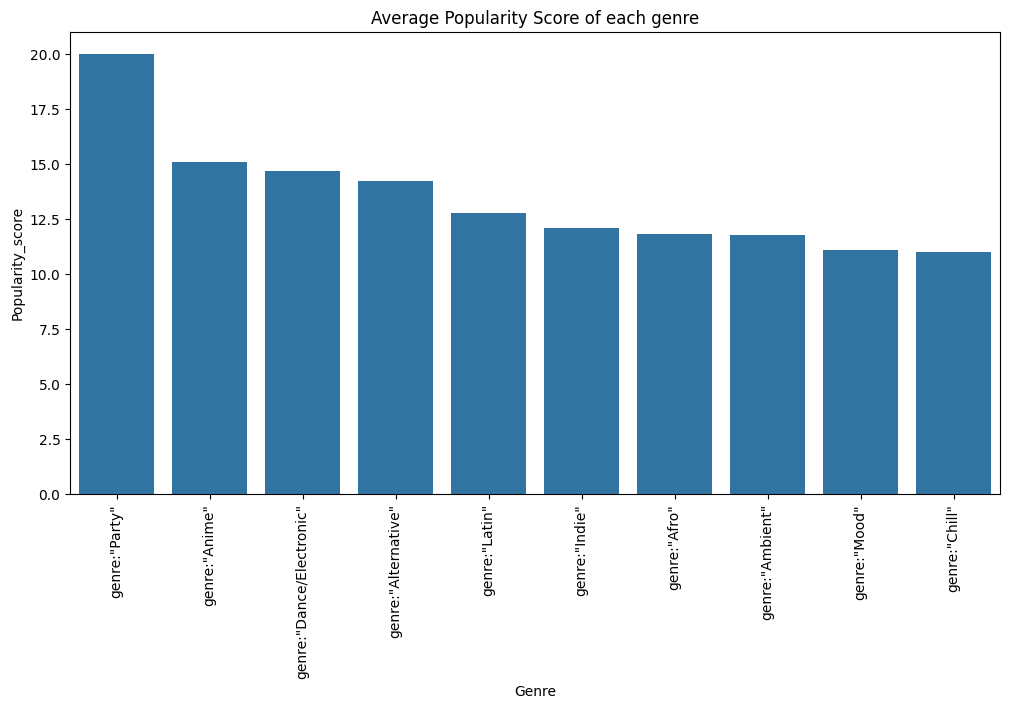

In [62]:
genre_popularity = filtered_df.groupby("Genre")["Popularity_score"].mean().reset_index()

# Sorting the popularity
genre_popularity = genre_popularity.sort_values("Popularity_score", ascending=False)

# Top 10 Popularity
genre_popularity = genre_popularity.head(10)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x="Genre", y="Popularity_score", data=genre_popularity)
plt.xticks(rotation=90)
plt.title("Average Popularity Score of each genre")
plt.show()

In [63]:
column_to_drop = ["Track_Id", 'type', 'id', 'uri', 'track_href','analysis_url',
       'duration_ms', 'time_signature']

# List of column to drop
filtered_df = filtered_df.drop(columns=column_to_drop)
print(filtered_df.head())

                Track_name  Artist_name  Popularity_score Release_year  \
2                 Moeilijk         TAVV                 2         2021   
3                Tha Nigga  Richie Rich                 1         2010   
4          Dramas e Karmas     Don Nuno                14         2018   
5            Nobody's Home    Do Or Die                25         1998   
9  Self Ventilation, Pt. 1         RíRá                 1         2022   

             Genre  danceability  energy  key  loudness  mode  speechiness  \
2  genre:"Hip-Hop"         0.769   0.395   10   -12.227     0       0.1210   
3  genre:"Hip-Hop"         0.664   0.758    6    -6.348     1       0.1320   
4  genre:"Hip-Hop"         0.380   0.639    0   -11.143     0       0.0813   
5  genre:"Hip-Hop"         0.649   0.462    4    -9.441     1       0.0377   
9  genre:"Hip-Hop"         0.656   0.804    6   -14.127     0       0.2090   

   acousticness  instrumentalness  liveness  valence    tempo  
2        0.2040       

In [64]:
print(f"Total rows: {len(filtered_df)}")

genre_popularity = filtered_df.groupby("Genre")["Popularity_score"].mean().reset_index()

# Sorting the popularity
genre_popularity = genre_popularity.sort_values("Popularity_score", ascending=False)

# Top 10 Popularity
top_10_genre = genre_popularity.head(10)["Genre"].values

# Filter the orignal DataFrame for these top 10 genre
filtered_df_top_genres = filtered_df[filtered_df["Genre"].isin(top_10_genre) ]

# Convert the "Year" column to int for proper sorting
filtered_df_top_genres["Release_year"] = filtered_df_top_genres["Release_year"].astype(int)

#Calculate the average popularity for each year and genre
year_genre_popularity = filtered_df_top_genres.groupby(["Release_year", "Genre"])["Popularity_score"].mean().reset_index()


Total rows: 735


<ipython-input-64-fe0cbbc541ec>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_top_genres["Release_year"] = filtered_df_top_genres["Release_year"].astype(int)


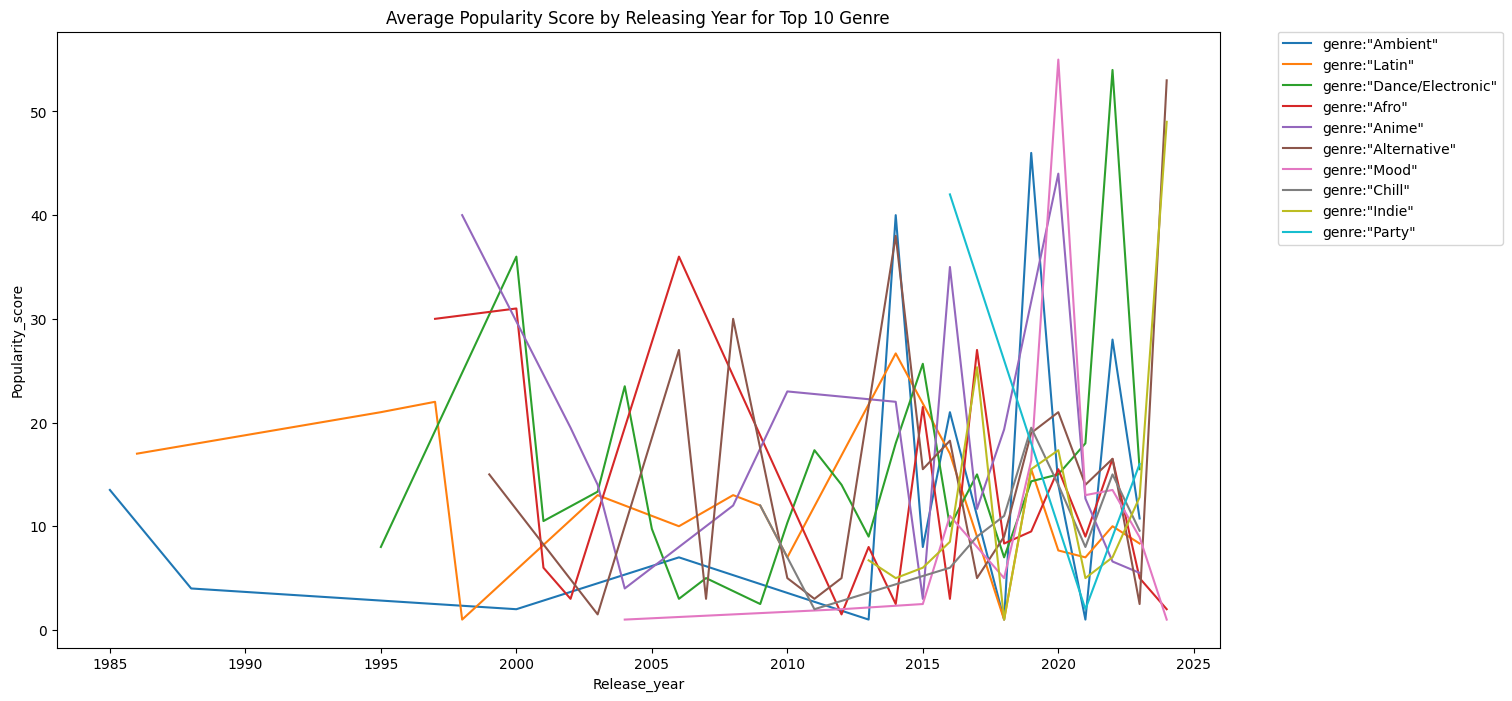

In [65]:
# Visualization
plt.figure(figsize=(15, 8))
sns.lineplot(x="Release_year", y="Popularity_score", hue="Genre", data=year_genre_popularity)
plt.title("Average Popularity Score by Releasing Year for Top 10 Genre")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

In [66]:
# convert release year column into int for proper sorting
filtered_df["Release_year"] = filtered_df["Release_year"].astype(int)

# calculate the average popularity  score foor each year and genre
year_genre_popularity  = filtered_df.groupby(["Release_year", "Genre"])["Popularity_score"].mean().reset_index()

# pivote the dataframe to create the marix.
popularity_matrix = year_genre_popularity.pivot(index="Release_year", columns="Genre", values="Popularity_score")


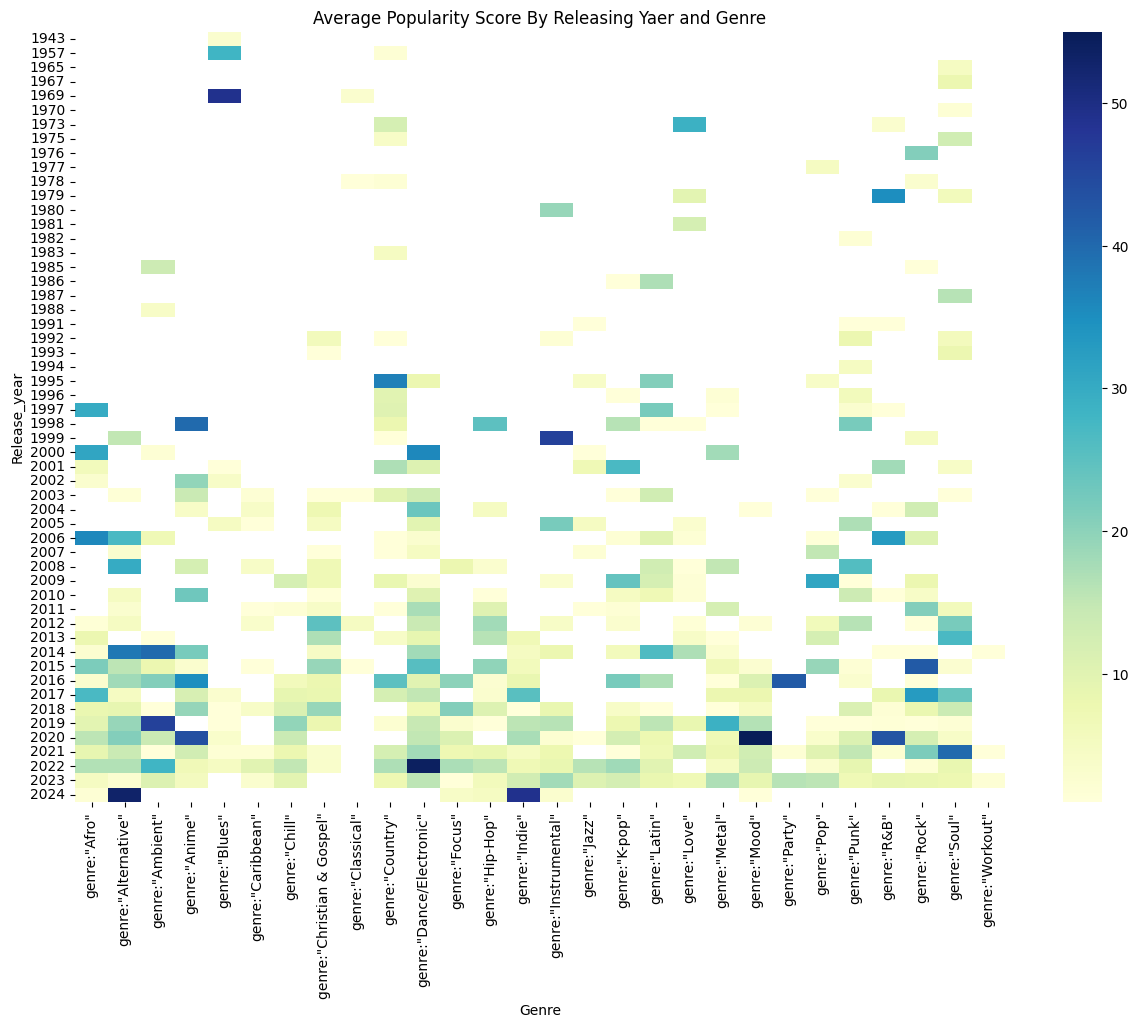

In [67]:
# Visualization
plt.figure(figsize=(15, 10))
sns.heatmap(popularity_matrix, cmap="YlGnBu")
plt.title("Average Popularity Score By Releasing Yaer and Genre")
plt.show()

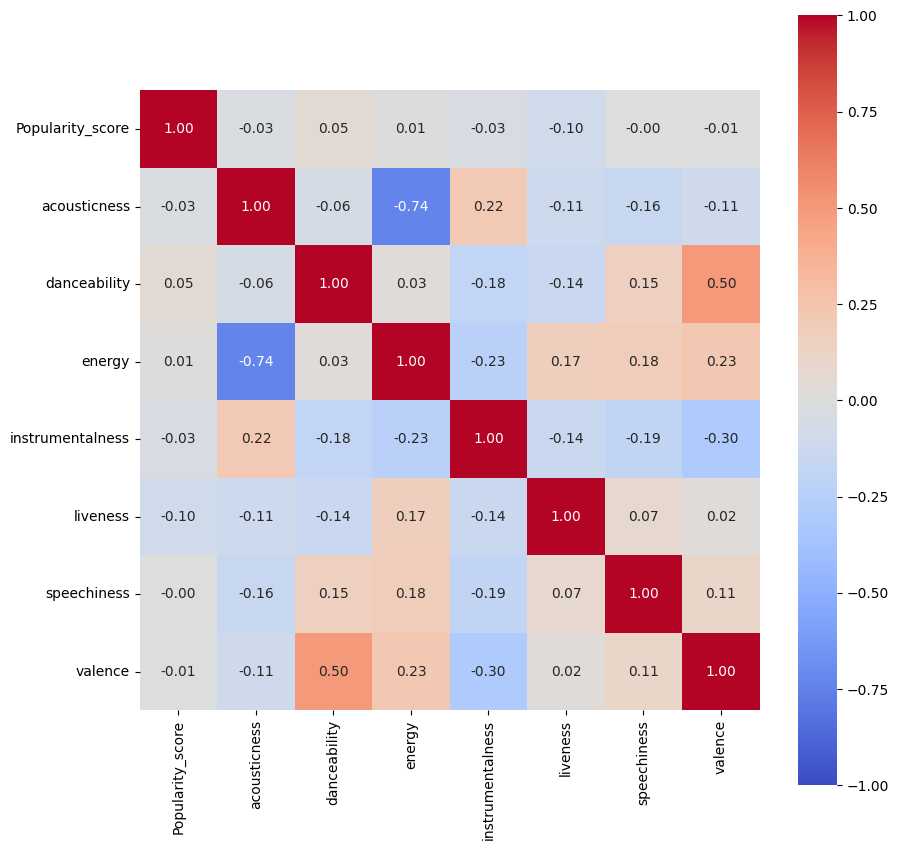

In [68]:
features = ["Popularity_score", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness", "valence"]

corr_matrix =  filtered_df[features].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot= True, cmap="coolwarm", fmt = ".2f", vmin=-1, vmax=1, square=True)
plt.show()

# **Linear Regression Process To Find the Reasion for Popularity**

Now we are using the linear regression model to get the actual reasion of the highest populariity of the song.

In [69]:
bins = [0, 49, 69, 100]
labels = ["Low", "Medium", "High"]

# Add popularity category to orignal dataframe
filtered_df["Popularity Category"] = pd.cut(filtered_df["Popularity_score"], bins=bins, labels=labels)

print(filtered_df)

                   Track_name      Artist_name  Popularity_score  \
2                    Moeilijk             TAVV                 2   
3                   Tha Nigga      Richie Rich                 1   
4             Dramas e Karmas         Don Nuno                14   
5               Nobody's Home        Do Or Die                25   
9     Self Ventilation, Pt. 1             RíRá                 1   
...                       ...              ...               ...   
1576                     Time     Argento Dust                 7   
1577       Dios Creó El Mundo      Susana Baca                 2   
1579                   Apa Mi         Lil Kesh                18   
1580    Viva o Rio de Janeiro  Esdras Nogueira                 2   
1581                    Jaiye             Qdot                10   

      Release_year            Genre  danceability  energy  key  loudness  \
2             2021  genre:"Hip-Hop"         0.769   0.395   10   -12.227   
3             2010  genre:"Hip-

In [70]:
# Create seperate DataFrame for each Popularity category

high_popularity_df = filtered_df[filtered_df["Popularity Category"] == "High"]
medium_popularity_df = filtered_df[filtered_df["Popularity Category"] == "Medium"]
low_popularity_df = filtered_df[filtered_df["Popularity Category"] == "Low"]

In [71]:
# checking high popularity data
high_popularity_df.head()

,Track_name,Artist_name,Popularity_score,Release_year,Genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Popularity Category


In [72]:
# checking low popularity data
low_popularity_df.head()

,Track_name,Artist_name,Popularity_score,Release_year,Genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Popularity Category
2,Moeilijk,TAVV,2,2021,"genre:""Hip-Hop""",0.769,0.395,10,-12.227,0,0.1210,0.2040,0.000000,0.0811,0.748,134.075,Low
3,Tha Nigga,Richie Rich,1,2010,"genre:""Hip-Hop""",0.664,0.758,6,-6.348,1,0.1320,0.1700,0.000002,0.1850,0.873,79.493,Low
4,Dramas e Karmas,Don Nuno,14,2018,"genre:""Hip-Hop""",0.380,0.639,0,-11.143,0,0.0813,0.7510,0.000000,0.1440,0.722,97.876,Low
5,Nobody's Home,Do Or Die,25,1998,"genre:""Hip-Hop""",0.649,0.462,4,-9.441,1,0.0377,0.1260,0.000007,0.2250,0.277,70.000,Low
9,"Self Ventilation, Pt. 1",RíRá,1,2022,"genre:""Hip-Hop""",0.656,0.804,6,-14.127,0,0.2090,0.0995,0.067500,0.1120,0.743,105.129,Low


In [73]:
# checking medium popularity data
medium_popularity_df.head()

,Track_name,Artist_name,Popularity_score,Release_year,Genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Popularity Category
393,Right on time,Metronomy,54,2022,"genre:""Dance/Electronic""",0.850,0.559,0,-9.652,1,0.0343,0.188,0.036500,0.0976,0.946,118.011,Medium
473,C4,HAARPER,55,2020,"genre:""Mood""",0.861,0.782,9,-3.914,0,0.1380,0.042,0.000388,0.1980,0.961,140.005,Medium
1153,That Bird of Prey Casts a Long Shadow,Random Forest,52,2022,"genre:""Focus""",0.525,0.188,0,-19.635,1,0.0322,0.590,0.839000,0.0975,0.121,110.020,Medium
1473,I’ll Come Off The Mountain,Sierra Ferrell,53,2024,"genre:""Alternative""",0.705,0.434,6,-6.837,1,0.0578,0.413,0.000000,0.1400,0.684,123.146,Medium


In [74]:
!pip install statsmodels
import statsmodels.api as model

y_h = medium_popularity_df["Popularity_score"]
x_h = medium_popularity_df[['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence']]

x_h = model.add_constant(x_h)

# Conduct the linear regression
model_h = model.OLS(y_h, x_h)
result_h = model_h.fit()

print(result_h.summary())


                            OLS Regression Results                            
Dep. Variable:       Popularity_score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 19 Apr 2024   Prob (F-statistic):                nan
Time:                        09:34:18   Log-Likelihood:                 119.54
No. Observations:                   4   AIC:                            -231.1
Df Residuals:                       0   BIC:                            -233.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.2585        inf  

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


In [75]:
y_h = low_popularity_df["Popularity_score"]
x_h = low_popularity_df[['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence']]

x_h = model.add_constant(x_h)

# Conduct the linear regression
model_h = model.OLS(y_h, x_h)
result_h = model_h.fit()

print(result_h.summary())

                            OLS Regression Results                            
Dep. Variable:       Popularity_score   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.931
Date:                Fri, 19 Apr 2024   Prob (F-statistic):             0.0383
Time:                        09:34:18   Log-Likelihood:                -2765.0
No. Observations:                 731   AIC:                             5552.
Df Residuals:                     720   BIC:                             5602.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               12.2362      3.900  

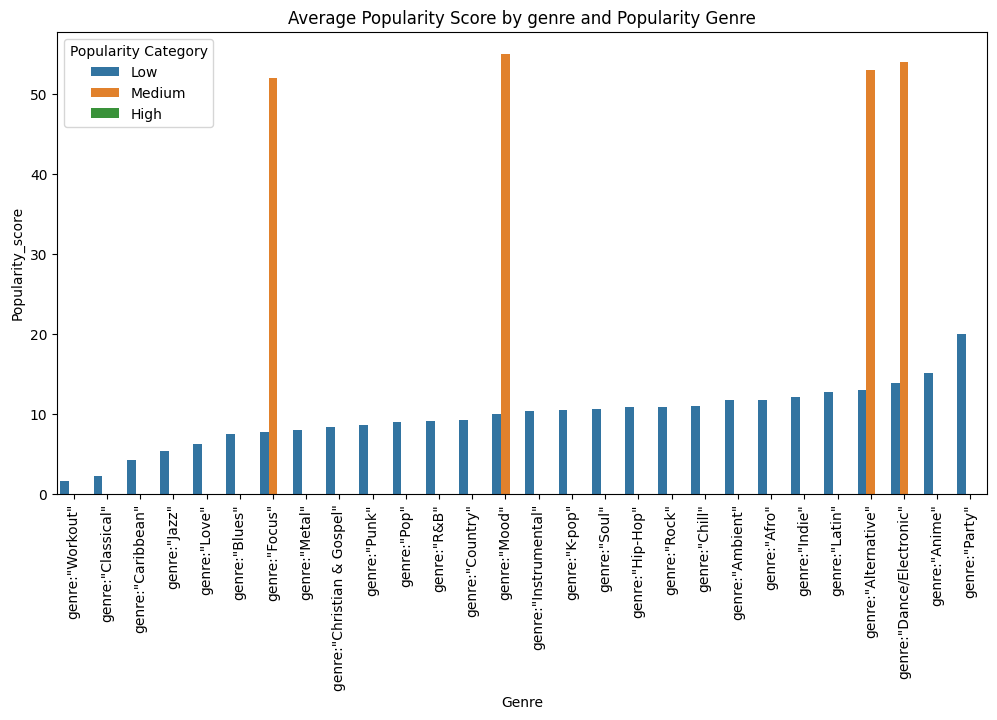

In [76]:
bins = [0, 49, 69, 100]
labels = ["Low", "Medium", "High"]

# Add popularity category to orignal dataframe
filtered_df["Popularity Category"] = pd.cut(filtered_df["Popularity_score"], bins=bins, labels=labels)

genre_popularity = filtered_df.groupby(["Genre","Popularity Category"])["Popularity_score"].mean().reset_index()

# Sorting the popularity
genre_popularity = genre_popularity.sort_values(["Popularity_score", "Popularity Category"], ascending=[True, False])

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x="Genre", y="Popularity_score", hue="Popularity Category",  data=genre_popularity)
plt.xticks(rotation=90)
plt.title("Average Popularity Score by genre and Popularity Genre")
plt.show()


